In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import cv2
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from google.colab.patches import cv2_imshow
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf

In [ ]:
scaled_features = pd.read_csv('/content/scaled_boneage.csv')

In [ ]:
x = scaled_features.drop(columns = ['male','boneage','id'], axis = 1)
y = scaled_features['boneage']



In [ ]:
scaled_features

Unnamed: 0     id  boneage  male    1         2         3         4  \
0               0   1377      180     0  0.0 -1.560237 -0.583802  0.780311   
1               1   1378       12     0  0.0  0.177853  0.203694  0.165015   
2               2   1379       94     0  0.0  3.247461  5.522963  6.572581   
3               3   1380      120     1  0.0  0.243920  0.697714  1.004606   
4               4   1381       82     0  0.0  0.088915  0.061847  0.052867   
...           ...    ...      ...   ...  ...       ...       ...       ...   
12606       12606  15605       50     0  0.0  0.815660  1.397167  1.559281   
12607       12607  15606      113     0  0.0  0.043176  0.039837  0.058929   
12608       12608  15608       55     0  0.0 -0.345607 -0.302553 -0.104746   
12609       12609  15609      150     1  0.0  0.391302  0.443367  0.322627   
12610       12610  15610      132     1  0.0 -0.147404 -0.219401 -0.468468   

              5         6  ...      1015      1016      1017      1018  \
0      0.221399 -0.937382  ...  0.563162  0.365317  0.235397  0.326632   
1      0.103280  0.119956  ...  0.348038  0.233157  0.120522 -0.026721   
2      3.883090  1.320475  ...  0.353959  0.235969  0.128180 -0.231294   
3      0.096718 -1.043850  ...  0.205937 -0.059281 -0.361955 -0.626492   
4      0.116404  0.175026  ...  0.375668  0.269712  0.147326  0.005824   
...         ...       ...  ...       ...       ...       ...       ...   
12606  0.720124  0.075900  ... -2.685417 -1.524282 -0.266225  0.061617   
12607  0.103280  0.127299  ... -2.827517 -1.586144 -0.316005  0.015123   
12608  0.234523  0.722051  ...  0.322381  0.182543  0.082230  0.047669   
12609  0.083593 -0.129693  ...  0.342117  0.196602  0.066913  0.019773   
12610 -0.818705 -0.852942  ...  0.342117  0.224721  0.105205  0.010474   

           1019      1020      1021      1022      1023  1024  
0      0.315830 -0.005371 -0.200495 -0.132342 -0.058859   0.0  
1     -0.111723 -0.092013 -0.134275 -0.229009 -0.249066   0.0  
2     -1.127160 -1.925179 -1.727442 -0.920785 -0.455393   0.0  
3      0.004882  1.303382  1.236861 -0.077966 -0.751987   0.0  
4     -0.014552  0.003749 -0.079741 -0.162550 -0.174917   0.0  
...         ...       ...       ...       ...       ...   ...  
12606  0.014600 -0.046412 -0.169333 -0.216926 -0.184589   0.0  
12607 -0.043703 -0.101134 -0.177123 -0.192759 -0.168470   0.0  
12608  0.004882 -0.028172 -0.025208 -0.068904 -0.113664   0.0  
12609  0.004882 -0.046412 -0.075846 -0.096092 -0.107216   0.0  
12610  0.009741  0.012869 -0.017417 -0.032654 -0.033068   0.0  

[12611 rows x 1028 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3,random_state=32)
x_train = x_train.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Initialize an empty list to store the reshaped rows
reshaped_rows = []

# Iterate over each row
for _, row in x_train.iterrows():
    # Convert the row to a NumPy array
    row_array = np.array(row)
    
    # Reshape the row to (32, 32)
    reshaped_row = np.reshape(row_array, (32, 32))
    
    # Expand the dimensions to add a third dimension
    expanded_row = np.expand_dims(reshaped_row, axis=2)
    
    # Append the reshaped row to the list
    reshaped_rows.append(expanded_row)

# Convert the list of reshaped rows to a TensorFlow tensor
tensor_data = tf.convert_to_tensor(reshaped_rows, dtype=tf.float64)

In [ ]:

# Reshape the input features to (num_samples, 1024, 1)
tensor_data = tf.reshape(tensor_data, (tensor_data.shape[0], -1))

# Define the batch size and other parameters
batch_size = 32
autotune = tf.data.experimental.AUTOTUNE

# Create the TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((tensor_data, y_train))
dataset = (
    dataset.shuffle(1024)
    .batch(batch_size, drop_remainder=True)
    .prefetch(autotune)
    .repeat()
)

In [ ]:
!pip install gpytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyro-ppl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import gpytorch
import pyro.distributions as dist
import pyro.distributions.transforms as T
from torch import nn
from torch.distributions import MultivariateNormal
from torch.distributions.transforms import AffineTransform, ComposeTransform


In [ ]:
import torch
import torch.nn as nn
from torch.distributions import constraints

from pyro.distributions.torch_transform import TransformModule
from pyro.distributions.util import copy_docs_from
from pyro.distributions.transforms.utils import clamp_preserve_gradients


In [ ]:
class InverseAutoregressiveFlow(TransformModule):
    """
    An implementation of Inverse Autoregressive Flow, using Eq (10) from Kingma Et Al., 2016,

        :math:`\\mathbf{y} = \\mu_t + \\sigma_t\\odot\\mathbf{x}`

    where :math:`\\mathbf{x}` are the inputs, :math:`\\mathbf{y}` are the outputs, :math:`\\mu_t,\\sigma_t`
    are calculated from an autoregressive network on :math:`\\mathbf{x}`, and :math:`\\sigma_t>0`.

    Together with `TransformedDistribution` this provides a way to create richer variational approximations.

    Example usage:

    >>> from pyro.nn import AutoRegressiveNN
    >>> base_dist = dist.Normal(torch.zeros(10), torch.ones(10))
    >>> iaf = InverseAutoregressiveFlow(AutoRegressiveNN(10, [40]))
    >>> pyro.module("my_iaf", iaf)  # doctest: +SKIP
    >>> iaf_dist = dist.TransformedDistribution(base_dist, [iaf])
    >>> iaf_dist.sample()  # doctest: +SKIP
        tensor([-0.4071, -0.5030,  0.7924, -0.2366, -0.2387, -0.1417,  0.0868,
                0.1389, -0.4629,  0.0986])

    The inverse of the Bijector is required when, e.g., scoring the log density of a sample with
    `TransformedDistribution`. This implementation caches the inverse of the Bijector when its forward
    operation is called, e.g., when sampling from `TransformedDistribution`. However, if the cached value
    isn't available, either because it was overwritten during sampling a new value or an arbitary value is
    being scored, it will calculate it manually. Note that this is an operation that scales as O(D) where D is
    the input dimension, and so should be avoided for large dimensional uses. So in general, it is cheap
    to sample from IAF and score a value that was sampled by IAF, but expensive to score an arbitrary value.

    :param autoregressive_nn: an autoregressive neural network whose forward call returns a real-valued
        mean and logit-scale as a tuple
    :type autoregressive_nn: nn.Module
    :param log_scale_min_clip: The minimum value for clipping the log(scale) from the autoregressive NN
    :type log_scale_min_clip: float
    :param log_scale_max_clip: The maximum value for clipping the log(scale) from the autoregressive NN
    :type log_scale_max_clip: float

    References:

    1. Improving Variational Inference with Inverse Autoregressive Flow [arXiv:1606.04934]
    Diederik P. Kingma, Tim Salimans, Rafal Jozefowicz, Xi Chen, Ilya Sutskever, Max Welling

    2. Variational Inference with Normalizing Flows [arXiv:1505.05770]
    Danilo Jimenez Rezende, Shakir Mohamed

    3. MADE: Masked Autoencoder for Distribution Estimation [arXiv:1502.03509]
    Mathieu Germain, Karol Gregor, Iain Murray, Hugo Larochelle
    """

    domain = constraints.real
    codomain = constraints.real
    bijective = True
    event_dim = 1
    autoregressive = True

    def __init__(self, autoregressive_nn, log_scale_min_clip=-5., log_scale_max_clip=3.):
        super(InverseAutoregressiveFlow, self).__init__(cache_size=1)
        self.arn = autoregressive_nn
        self._cached_log_scale = None
        self.log_scale_min_clip = log_scale_min_clip
        self.log_scale_max_clip = log_scale_max_clip

    def _call(self, x):
        """
        :param x: the input into the bijection
        :type x: torch.Tensor

        Invokes the bijection x=>y; in the prototypical context of a TransformedDistribution `x` is a
        sample from the base distribution (or the output of a previous flow)
        """
        mean, log_scale = self.arn(x)
        log_scale = clamp_preserve_gradients(log_scale, self.log_scale_min_clip, self.log_scale_max_clip)
        self._cached_log_scale = log_scale
        scale = torch.exp(log_scale)

        y = scale * x + mean
        return y

    def _inverse(self, y):
        """
        :param y: the output of the bijection
        :type y: torch.Tensor

        Inverts y => x. Uses a previously cached inverse if available, otherwise performs the inversion afresh.
        """
        x_size = y.size()[:-1]
        perm = self.arn.permutation
        input_dim = y.size(-1)
        x = [torch.zeros(x_size, device=y.device)] * input_dim

        # NOTE: Inversion is an expensive operation that scales in the dimension of the input
        for idx in perm:
            mean, log_scale = self.arn(torch.stack(x, dim=-1))
            inverse_scale = torch.exp(-clamp_preserve_gradients(
                log_scale[..., idx], min=self.log_scale_min_clip, max=self.log_scale_max_clip))
            mean = mean[..., idx]
            x[idx] = (y[..., idx] - mean) * inverse_scale

        x = torch.stack(x, dim=-1)
        log_scale = clamp_preserve_gradients(log_scale, min=self.log_scale_min_clip, max=self.log_scale_max_clip)
        self._cached_log_scale = log_scale
        return x

    def log_abs_det_jacobian(self, x, y):
        """
        Calculates the elementwise determinant of the log jacobian
        """
        if self._cached_log_scale is not None:
            log_scale = self._cached_log_scale
        else:
            _, log_scale = self.arn(x)
            log_scale = clamp_preserve_gradients(log_scale, self.log_scale_min_clip, self.log_scale_max_clip)
        return log_scale.sum(-1)



In [ ]:
# Define the normalizing flow
flow_transforms = [AffineTransform(loc=torch.tensor([0.0, 0.0]), scale=torch.tensor([1.0, 1.0]))]
flow_transforms.append(T.AffineAutoregressive(nn.Linear(2, 2)))
flow_transform = T.ComposeTransform(flow_transforms)
iaf = InverseAutoregressiveFlow(flow_transform)


In [ ]:
# Create a GP model
# class GPModel(gpytorch.models.ExactGP):
    # def __init__(self, train_x, train_y, likelihood):
    #     super(GPModel, self).__init__(train_x, train_y, likelihood)
    #     self.mean_module = gpytorch.means.ConstantMean()
    #     self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
class GPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        self.output_dim = train_y.size(-1)  # Specify the output dimension

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)


In [ ]:

images_subset, labels_subset = next(iter(dataset.batch(32)))

In [ ]:
image_shape = (32, 32, 1)
image_size = tf.reduce_prod(image_shape)
print(image_size)

tf.Tensor(1024, shape=(), dtype=int32)


In [ ]:
images_subset = tf.reshape(images_subset, [-1, image_size])
labels_subset = tf.reshape(labels_subset, [-1, 1])

In [ ]:
print(images_subset)

tf.Tensor(
[[ 0.         -0.26429312 -0.25119471 ... -0.40421874 -0.37157251
   0.        ]
 [ 0.          0.04317597  0.03983654 ... -0.17161289 -0.18458897
   0.        ]
 [ 0.          0.08383304  0.04228218 ... -0.0900498  -0.12978345
   0.        ]
 ...
 [ 0.          0.15752398  0.1156514  ... -0.16255032 -0.19748439
   0.        ]
 [ 0.         -0.21601285 -0.27075983 ...  0.84339445  0.54400204
   0.        ]
 [ 0.          0.15752398  0.15478166 ...  0.03682612 -0.04273939
   0.        ]], shape=(1024, 1024), dtype=float64)


In [ ]:
print(labels_subset)

tf.Tensor(
[[162]
 [216]
 [108]
 ...
 [ 50]
 [156]
 [198]], shape=(1024, 1), dtype=int64)


In [ ]:
print(torch.as_tensor(x_train.values))

tensor([[ 0.0000e+00, -8.8960e-02, -8.7337e-02,  ...,  3.5967e-03,
         -5.2411e-02,  0.0000e+00],
        [ 0.0000e+00,  1.2019e+00,  1.3483e+00,  ..., -2.7432e-01,
         -2.8775e-01,  0.0000e+00],
        [ 0.0000e+00,  2.7901e+00,  3.0113e+00,  ...,  3.3805e-02,
          2.3946e-03,  0.0000e+00],
        ...,
        [ 0.0000e+00,  6.0963e-02,  7.8967e-02,  ...,  1.1839e-01,
          1.8514e-02,  0.0000e+00],
        [ 0.0000e+00,  4.1925e-01,  2.2717e-02,  ..., -1.7765e-01,
         -1.7814e-01,  0.0000e+00],
        [ 0.0000e+00,  9.1456e-02,  1.0587e-01,  ..., -3.2654e-02,
         -9.7545e-02,  0.0000e+00]], dtype=torch.float64)


In [ ]:
torch.as_tensor(y_train.values)

tensor([120, 120, 150,  ...,  82,  96, 156])

In [ ]:
2
x_train = torch.as_tensor(x_train.values, dtype=torch.float32)
y_train = torch.as_tensor(y_train.values, dtype=torch.float32)

# Create a Gaussian Process model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPModel(x_train, y_train, likelihood)

In [ ]:
# # Create a Gaussian Process model
# likelihood = gpytorch.likelihoods.GaussianLikelihood()
# model = GPModel(x_train, y_train, likelihood)


In [ ]:

import pyro.distributions as dist

In [ ]:

# Define the base distribution
base_distribution = MultivariateNormal(torch.zeros(2), torch.eye(2))


In [ ]:
import tqdm

# Define the normalizing flow
flow_model = dist.TransformedDistribution(base_distribution, [iaf])
# x_train = x_train.to('cuda')
# y_train = y_train.to('cuda')
# Train the model
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# Set up tqdm progress bar
progress_bar = tqdm.tqdm(range(100), desc='Training Progress')

for i in progress_bar:
    optimizer.zero_grad()
    output = model(x_train)
    loss = -mll(output, y_train)
    loss.backward()
    optimizer.step()

    # Update the progress bar description
    progress_bar.set_postfix({'Loss': loss.item()})

# Close the progress bar
progress_bar.close()


Training Progress: 100%|██████████| 100/100 [10:10<00:00,  6.11s/it, Loss=325]


In [ ]:
torch.Size([1000])

torch.Size([1000])

In [ ]:
# Make predictions with uncertainty
model.eval()
likelihood.eval()
# test_x = torch.randn(10, 2)
with torch.no_grad():
    transformed_dist = flow_model.base_dist
    samples = transformed_dist.sample(torch.Size([1000]))
    prediction_mean = samples.mean(dim=0)
    prediction_covar = torch.cov(samples.T)


In [ ]:

# Access the uncertainty estimates
print("Predicted Mean:")
print(prediction_mean)
print("\nPredicted Covariance Matrix:")
print(prediction_covar)

Predicted Mean:
tensor([ 0.0299, -0.0341])

Predicted Covariance Matrix:
tensor([[ 0.9444, -0.0058],
        [-0.0058,  0.9535]])


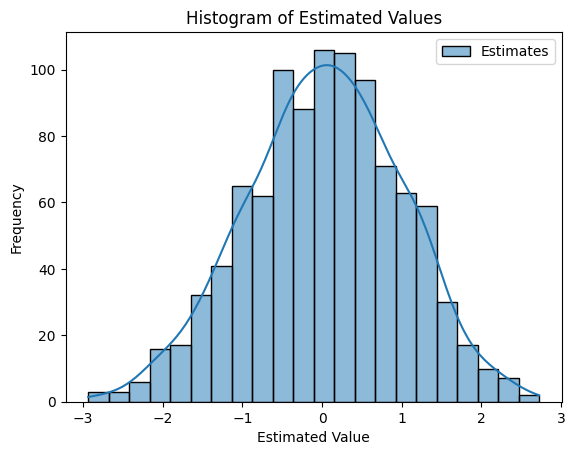

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Histogram
plt.figure()
sns.histplot(samples[:, 0], kde=True, label='Estimates')
plt.xlabel('Estimated Value')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Values')
plt.legend()
plt.show()


In [ ]:
# Plot Distribution (Kernel Density Estimation)
plt.figure()
sns.kdeplot(samples[:, 0], label='Estimated Distribution from Kernel Density Estimation')
plt.xlabel('Estimated Value')
plt.ylabel('Density')
plt.title('Distribution Plot')
plt.legend()
plt.show()

In [ ]:
n_samples = 1000
nf_samples = flow_model.sample(torch.Size([n_samples]))
gp_predictions = []
for sample in nf_samples:
    gp_prediction = model(sample)
    gp_predictions.append(gp_prediction)
mean_vectors = [pred.mean for pred in gp_predictions]
covariance_matrices = [pred.covariance_matrix for pred in gp_predictions]
confidence_intervals = []
for dim in range(output_dimension):
    predictions_dim = torch.stack([mean[dim] for mean in mean_vectors])
    std_dev = torch.stack([covariance[dim, dim].sqrt() for covariance in covariance_matrices])
    lower_bound = predictions_dim - 1.96 * std_dev
    upper_bound = predictions_dim + 1.96 * std_dev
    confidence_intervals.append((lower_bound, upper_bound))


ValueError: ignored